## Import

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pandas as pd
import pathlib

## Functions

In [2]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """
    
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [5]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [6]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [7]:
def view_random_image(target_dir, class_name=""):
  target_folder = target_dir + '/' + class_name
  
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_folder)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

  return img

## Download the dataset

In [9]:
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip'

zip_dir = tf.keras.utils.get_file(origin=url, extract=True)
zip_dir

'C:\\Users\\bruce\\.keras\\datasets\\10_food_classes_all_data.zip'

```
# File structure
pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
```

In [13]:
base_dir = os.path.join(os.path.dirname(zip_dir), '10_food_classes_all_data')
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# train_pizza_dir = os.path.join(train_dir, 'pizza')  # directory with our training pizza pictures
# train_steak_dir = os.path.join(train_dir, 'steak')  # directory with our training steak pictures
# test_pizza_dir = os.path.join(test_dir, 'pizza')  # directory with our test pizza pictures
# test_steak_dir = os.path.join(test_dir, 'steak')  # directory with our test steak pictures

# num_pizza_tr = len(os.listdir(train_pizza_dir))
# num_steak_tr = len(os.listdir(train_steak_dir))

# num_pizza_test = len(os.listdir(test_pizza_dir))
# num_steak_test = len(os.listdir(test_steak_dir))

# total_train = num_pizza_tr + num_steak_tr
# total_test = num_pizza_test + num_steak_test

# print('total training pizza images:', num_pizza_tr)
# print('total training steak images:', num_steak_tr)

# print('total test pizza images:', num_pizza_test)
# print('total test steak images:', num_steak_test)
# print("--")
# print("Total training images:", total_train)
# print("Total test images:", total_test)

# print("--")
data_dir = pathlib.Path(train_dir) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [14]:
walk_through_dir(base_dir)

There are 2 directories and 0 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data'.
There are 10 directories and 0 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data\test'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\10_food_clas

['3153587.jpg']
Image shape: (512, 384, 3)


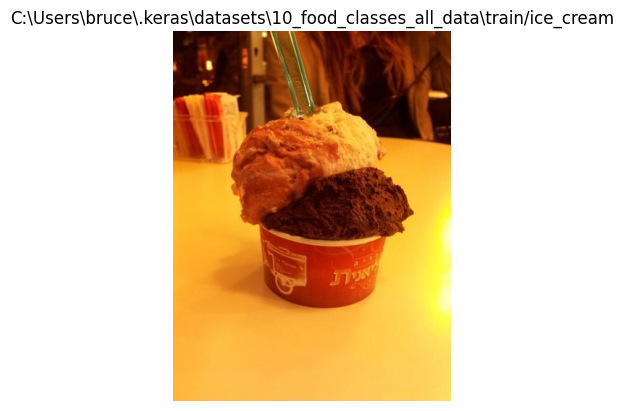

In [15]:
rand_img = view_random_image(target_dir=train_dir, class_name='ice_cream')

## Prepare BatchDataset

Instead of using `ImageDataGenerator()`, we now introduce `image_dataset_from_directory()`.

In [16]:
BATCH_SIZE = 32
IMG_SHAPE  = 224

train_batches = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SHAPE, IMG_SHAPE),
    label_mode='categorical',
    batch_size=BATCH_SIZE
)

for images, labels in train_batches.take(1):
    print(images, labels)

Found 7500 files belonging to 10 classes.
tf.Tensor(
[[[[2.17857147e+02 2.01198990e+02 1.95841827e+02]
   [2.12051025e+02 1.98311234e+02 1.89454086e+02]
   [2.31663269e+02 2.10938782e+02 1.84459183e+02]
   ...
   [2.32280579e+02 2.14852051e+02 1.95494843e+02]
   [2.33785690e+02 2.16785690e+02 1.96785690e+02]
   [2.32000107e+02 2.17000107e+02 1.96000107e+02]]

  [[2.11122437e+02 2.00836731e+02 1.99096939e+02]
   [2.19234695e+02 2.05438782e+02 1.93071426e+02]
   [2.33403046e+02 2.06974487e+02 1.73275513e+02]
   ...
   [2.31300995e+02 2.13872467e+02 1.94515259e+02]
   [2.31137741e+02 2.14137741e+02 1.94137741e+02]
   [2.30168365e+02 2.13168365e+02 1.93168365e+02]]

  [[2.09122452e+02 2.04632660e+02 2.03061234e+02]
   [2.24117355e+02 2.08403061e+02 1.92091843e+02]
   [2.27734695e+02 1.91688766e+02 1.44188782e+02]
   ...
   [2.34954086e+02 2.17188812e+02 1.99571457e+02]
   [2.32801025e+02 2.15372452e+02 1.97586731e+02]
   [2.30714188e+02 2.13285614e+02 1.95499893e+02]]

  ...

  [[2.2047450

In [17]:
val_batches = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SHAPE, IMG_SHAPE),
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 2500 files belonging to 10 classes.


## Build models using pretrained models on `tf.keras.applications`

### EfficientNetB0 model

In [18]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

input_layer = tf.keras.layers.Input(shape=(IMG_SHAPE, IMG_SHAPE, 3), name='input_layer')

augmentation_layers = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    # tf.keras.layers.Rescaling(1./255), # needed by models like ResNet50V2 but EfficientNetB0
], name='augmentation_layers')

x = augmentation_layers(input_layer)

x = base_model(x)
print(f'Shape after passing inputs through base mode: {x.shape}')

# aggregate all the most important information, reduce number of computations
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_2d_layer')(x)
print(f'Shape after GlobalAveragePooling2D: {x.shape}')

output_layer = tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layer')(x)

effnet_b0_model = tf.keras.Model(input_layer, output_layer)

effnet_b0_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

inital_epochs = 5

effnet_b0_history = effnet_b0_model.fit(
    train_batches,
    epochs=inital_epochs,
    validation_data=val_batches
)

Shape after passing inputs through base mode: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Epoch 1/5
235/235 [==============================] - 313s 1s/step - loss: 1.0408 - accuracy: 0.6988 - val_loss: 0.4621 - val_accuracy: 0.8704
Epoch 2/5
235/235 [==============================] - 251s 1s/step - loss: 0.6447 - accuracy: 0.8027 - val_loss: 0.3808 - val_accuracy: 0.8844
Epoch 3/5
235/235 [==============================] - 244s 1s/step - loss: 0.5726 - accuracy: 0.8196 - val_loss: 0.3523 - val_accuracy: 0.8880
Epoch 4/5
235/235 [==============================] - 241s 1s/step - loss: 0.5373 - accuracy: 0.8300 - val_loss: 0.3402 - val_accuracy: 0.8860
Epoch 5/5
235/235 [==============================] - 233s 991ms/step - loss: 0.5023 - accuracy: 0.8429 - val_loss: 0.3276 - val_accuracy: 0.8912


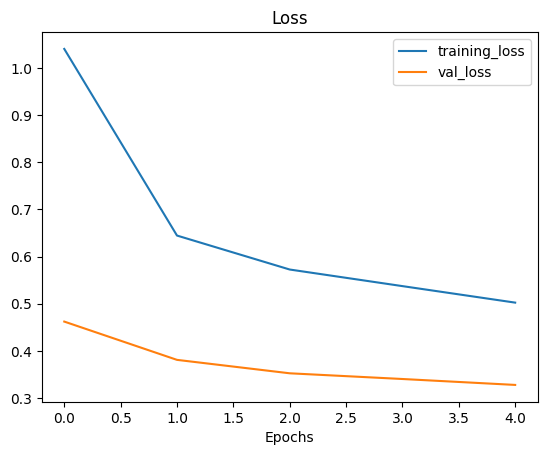

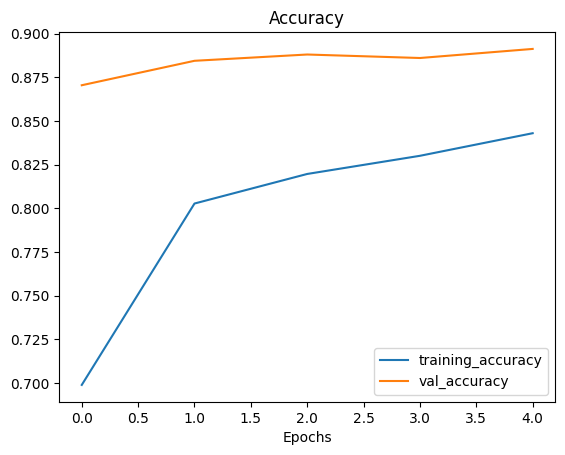

In [19]:
plot_loss_curves(effnet_b0_history)

### Fine-tuning model

In [20]:
for i, layer in enumerate(effnet_b0_model.layers):
    print(i, layer.name, layer.trainable)

0 input_layer True
1 augmentation_layers True
2 efficientnetb0 False
3 global_average_pooling_2d_layer True
4 output_layer True


#### Unfreeze the top 10 layers

In [21]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
    layer.trainable = False

In [22]:
effnet_b0_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine-tuning typically want to lower the learning rate by 10X
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

finetune_epochs = inital_epochs + 5

effnet_b0_finetune_history = effnet_b0_model.fit(
    train_batches,
    epochs=finetune_epochs,
    validation_data=val_batches,
    initial_epoch=effnet_b0_history.epoch[-1] # start training from previous last epoch
)

Epoch 5/10
235/235 [==============================] - 235s 964ms/step - loss: 0.5107 - accuracy: 0.8385 - val_loss: 0.2992 - val_accuracy: 0.8984
Epoch 6/10
235/235 [==============================] - 216s 920ms/step - loss: 0.4366 - accuracy: 0.8640 - val_loss: 0.2784 - val_accuracy: 0.9060
Epoch 7/10
235/235 [==============================] - 211s 899ms/step - loss: 0.4054 - accuracy: 0.8667 - val_loss: 0.2684 - val_accuracy: 0.9112
Epoch 8/10
235/235 [==============================] - 212s 903ms/step - loss: 0.3731 - accuracy: 0.8869 - val_loss: 0.2571 - val_accuracy: 0.9132
Epoch 9/10
235/235 [==============================] - 206s 878ms/step - loss: 0.3572 - accuracy: 0.8835 - val_loss: 0.2507 - val_accuracy: 0.9140
Epoch 10/10
235/235 [==============================] - 208s 884ms/step - loss: 0.3244 - accuracy: 0.9000 - val_loss: 0.2431 - val_accuracy: 0.9200


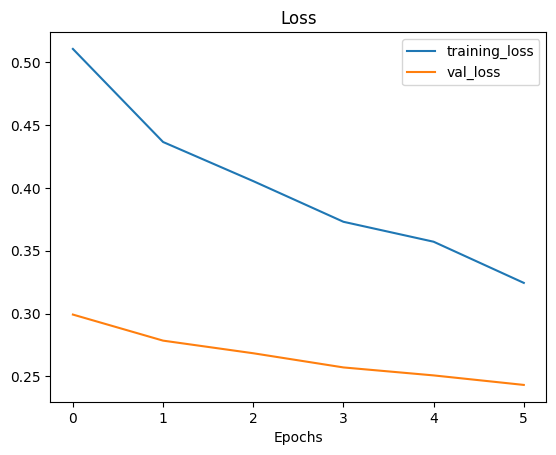

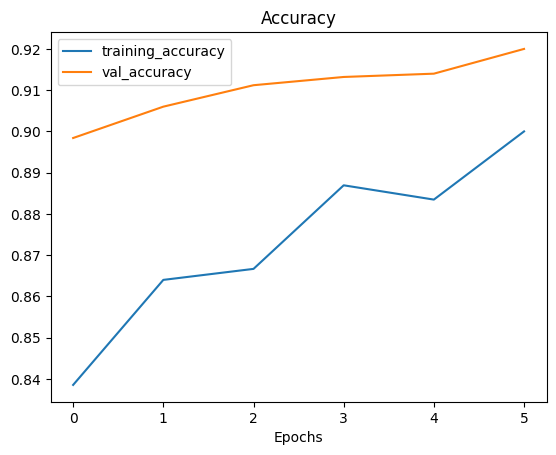

In [23]:
plot_loss_curves(effnet_b0_finetune_history)

### Before & After fine-tuning

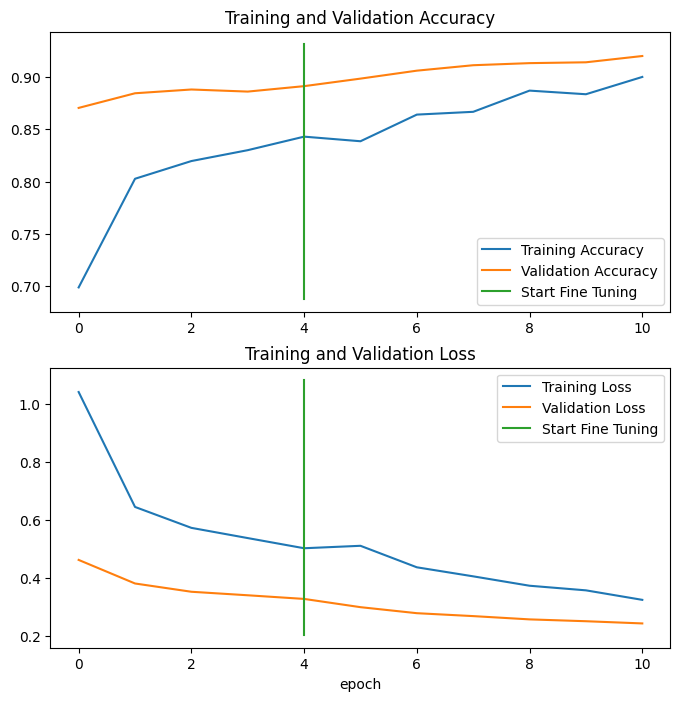

In [24]:
compare_historys(effnet_b0_history, effnet_b0_finetune_history, inital_epochs)